对于同一个星系，画出地面望远镜（SDSS or DESI）和空间望远镜（Hubble）的（尽量同一波段）fits图像的对比，采用相同的灰度（color bar）；定出星系的中心（流量最高点），计算其赤经赤纬。

In [2]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS

with fits.open("hst_10592_55_acs_wfc_f814w_sci.fits") as hdul:
    image_data_hst = hdul[1].data
    wcs_hst = WCS(hdul[1].header)

ra, dec = 229.52558, 42.74585
cutout_size_hst = 500

center_pixel = wcs_hst.world_to_pixel_values(ra, dec)
x_center, y_center = int(center_pixel[0]), int(center_pixel[1])

x_min, x_max = x_center - cutout_size_hst, x_center + cutout_size_hst
y_min, y_max = y_center - cutout_size_hst, y_center + cutout_size_hst

cutout_data_hst = image_data_hst[y_min:y_max, x_min:x_max]


In [ ]:
with fits.open("frame-r-003918-3-0213.fits") as hdul:
    image_data_sdss = hdul[0].data
    wcs_sdss = WCS(hdul[0].header)

ra, dec = 229.52558, 42.74585
cutout_size_sdss = 50

center_pixel = wcs_sdss.world_to_pixel_values(ra, dec)
x_center, y_center = int(center_pixel[0]), int(center_pixel[1])


x_min, x_max = x_center - cutout_size_sdss, x_center + cutout_size_sdss
y_min, y_max = y_center - cutout_size_sdss, y_center + cutout_size_sdss

cutout_data_sdss = image_data_sdss[y_min:y_max, x_min:x_max].T
cutout_data_sdss = cutout_data_sdss[:, ::-1]


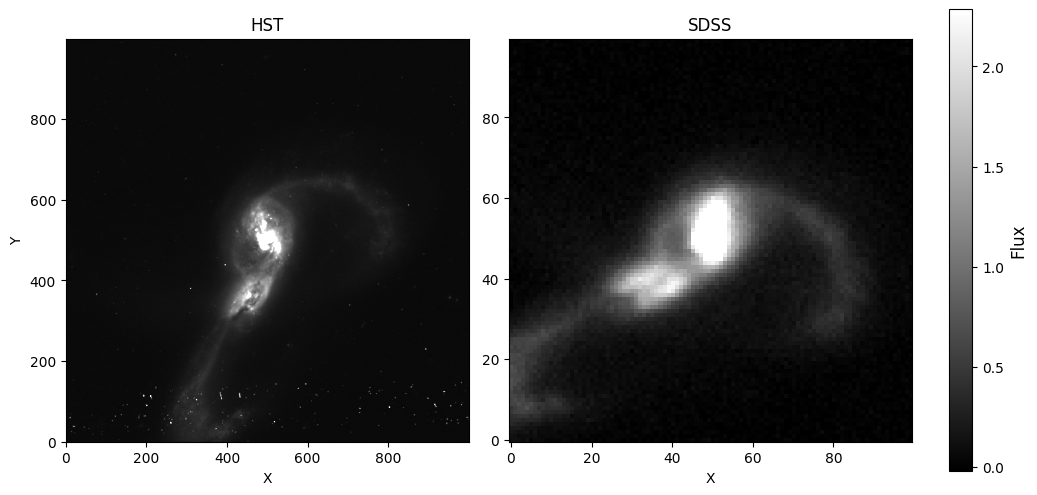

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[1, 1], wspace=0.1)

vmin = min(np.percentile(cutout_data_hst, 5), np.percentile(cutout_data_sdss, 5))
vmax = max(np.percentile(cutout_data_hst, 99), np.percentile(cutout_data_sdss, 99))

ax1 = fig.add_subplot(gs[0, 0])
im1 = ax1.imshow(cutout_data_hst, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
ax1.set_title("HST")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

ax2 = fig.add_subplot(gs[0, 1])
im2 = ax2.imshow(cutout_data_sdss, origin='lower', cmap='gray', vmin=vmin, vmax=vmax)
ax2.set_title("SDSS")
ax2.set_xlabel("X")

cbar = fig.colorbar(im2, ax=[ax1, ax2], orientation='vertical', fraction=0.05, pad=0.04)
cbar.set_label("Flux", fontsize=12)

plt.show()

In [ ]:

# 为什么方向不一致？

In [5]:
sdss_max_pos = np.unravel_index(np.argmax(cutout_data_sdss), cutout_data_sdss.shape)
hubble_max_pos = np.unravel_index(np.argmax(cutout_data_hst), cutout_data_hst.shape)

sdss_center = wcs_sdss.pixel_to_world(sdss_max_pos[1], sdss_max_pos[0])
hubble_center = wcs_hst.pixel_to_world(hubble_max_pos[1], hubble_max_pos[0])

print(f"SDSS Center of VV705 (RA, Dec): {sdss_center.ra.deg:.6f}, {sdss_center.dec.deg:.6f}")
print(f"Hubble Center of VV705 (RA, Dec): {hubble_center.ra.deg:.6f}, {hubble_center.dec.deg:.6f}")

SDSS Center of VV705 (RA, Dec): 229.370399, 42.716527
Hubble Center of VV705 (RA, Dec): 229.557930, 42.715926


1个本地（红移为0 ）重子物质为10^11 Msun的星系，假设其物质密度分布为指数盘形式，指数盘的scalelength 为 3Kpc，该星系所在的暗物质晕的质量为10^12Msun，暗物质的物质密度轮廓服从NFW分布（c=10），该星系的运动为旋转的盘，请画出该星系的旋转曲线。

Text(0, 0.5, 'Velocity (km/s)')

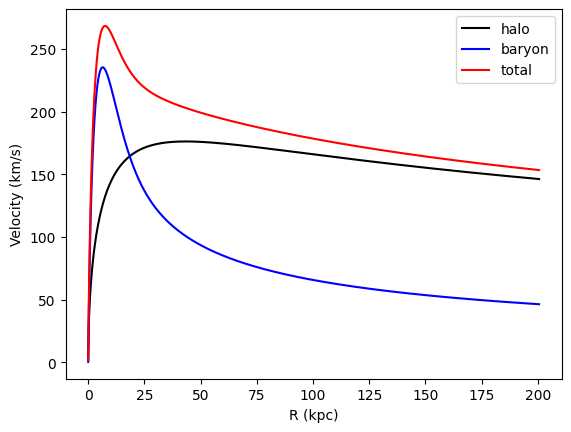

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import iv
from scipy.special import kv

G = 6.67e-8
mSun = 1.988e33  #g
kpc = 3.08568e21  #cm

c = 10
H_z = 2.36573e-18
M_halo = 1e12 * mSun
den_crit = 1e-29
del_0 = (200 / 3) * pow(c, 3) / (np.log(1 + c) - c / (c + 1))
r_200 = pow(G * M_halo / (100 * H_z ** 2), 1 / 3)
r_s = r_200 / c

R = np.linspace(1e-3, r_200/kpc, 1000)
M_halo = 4 * np.pi * den_crit * del_0 * pow(r_s, 3) * (np.log((r_s + R * kpc) / r_s) - R * kpc / (r_s + R * kpc))
v_halo = np.sqrt(G * M_halo / (R * kpc))

plt.plot(R, v_halo/1e5, color = 'k', label = 'halo')

M_b = 1e11 * mSun
R_d = 3 * kpc
y = R * kpc / (2 * R_d)
sig_0 = M_b / (2 * np.pi * R_d ** 2)
v_b = np.sqrt(4 * np.pi * G * sig_0 * R_d * y ** 2 * (iv(0, y) * kv(0, y) - iv(1, y) * kv(1, y)))
plt.plot(R, v_b/1e5, color = 'b', label = 'baryon')

v_tot = np.sqrt(v_halo ** 2 + v_b ** 2)
plt.plot(R, v_tot/1e5, color = 'r', label = 'total')

plt.legend(fontsize=10.0,loc = 'upper right')
plt.xlabel('R (kpc)')
plt.ylabel('Velocity (km/s)')

In [ ]:
# good job

对于Sersic指数分别是n=1，3，4的三个星系来说，其R90/R50分别是多少？

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = [1,3,4]

def integral_I(R, s):
    I_sum = 0
    for i in range(s):
        if r[i] < R:
            I_sum += I_R[i] * r[i] * dr[i]
    return I_sum

for n in N:
    print("When n = %s" %n)
    s = 10000
    if n == 1:
        r = np.linspace(1e-2, 5e2, s)
    elif n == 3:
        r = np.linspace(1e-2, 5e3, s)
    else:
        r = np.linspace(1e-2, 5e4, s)        
    dr = r[1:] - r[:-1]

    I_0 = 1
    alpha = 1
    
    I_R = I_0 / np.exp(pow(r / alpha, 1 / n))
    I_tot = integral_I(r[-1], s-1)
    for i in range(s):
        if integral_I(r[i], s) / I_tot > 0.5:
            R_50 = r[i]
            break
    for i in range(s):    
        if integral_I(r[i], s) / I_tot > 0.9:
            R_90 = r[i]
            break       
    c = R_50/R_90
    print("R_50/R_90 = %f" %c)


When n = 1
R_50/R_90 = 0.431818
When n = 3
R_50/R_90 = 0.229425
When n = 4
R_50/R_90 = 0.195108


In [ ]:
# good